## Principal Component Analysis

Bu bölümde, denetimsiz algoritmaların belki de en yaygın kullanılanlarından biri olan temel bileşen analizini (PCA) keşfedeceğiz. PCA temelde bir boyut azaltma algoritmasıdır, ancak aynı zamanda görselleştirme, gürültü filtreleme, özellik çıkarma ve mühendislik ve çok daha fazlası için bir araç olarak da faydalı olabilir. PCA algoritmasının kısa bir kavramsal tartışmasından sonra, bu diğer uygulamaların birkaç örneğini göreceğiz.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Principal Component Analysis

Temel bileşen analizi, verilerde boyutsallığı azaltmak için hızlı ve esnek bir denetimsiz yöntemdir.Yöntemin davranışını iki boyutlu bir veri kümesine bakarak görselleştirmek en kolayıdır.

Aşağıdaki 200 noktayı ele alalım:

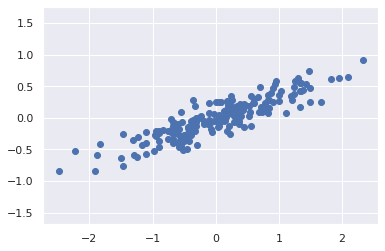

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Gözle bakınca, x ve y değişkenleri arasında neredeyse doğrusal bir ilişki olduğu net bir şekilde görülmektedir.

Bu, bize doğrusal regresyon verilerini anımsatır, ancak buradaki amaç biraz farklıdır: 

x'ten y değerlerini *tahmin etmeye çalışmak yerine, denetimsiz öğrenme problemi olarak ele alarak x ve y değerleri arasındaki *ilişkiyi* öğrenmeye çalışıyoruz.

Temel bileşen analizinde bu ilişki, verilerdeki *temel eksenlerin* bir listesini bularak ve bu temel eksenleri veri kümesini tanımlamak için kullanarak bulunur.

Scikit-Learn'ün ``PCA`` tahmin edicisini kullanarak bunu şu şekilde hesaplayabiliriz:


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Bu fonksiyonla "bileşenler" ve "açıklanan varyans" değerleri elde edilir:

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [6]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Bu sayıların ne anlama geldiğini görmek için, vektörün yönünü tanımlamak için "bileşenleri" ve vektörün kare uzunluğunu tanımlamak için "açıklanan varyansı" kullanarak bunları giriş verileri üzerinde vektörler olarak görselleştirelim:

Bu vektörler, verilerin *ana eksenlerini* temsil eder ve vektörün uzunluğu, bu eksenin verilerin dağılımını tanımlamada ne kadar "önemli" olduğunun bir göstergesidir - daha doğrusu, verilerin bu eksene yansıtıldığındaki varyansının bir ölçüsüdür. 

Her bir veri noktasının ana eksenlere izdüşümü, verilerin "temel bileşenleri"dir.

Bu temel bileşenleri orijinal verilerin yanında çizersek, burada gösterilen çizimleri görürüz:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-PCA-rotation.png?raw=1)

Veri eksenlerinden ana eksenlere olan bu dönüşüm, temel olarak bir öteleme, döndürme ve tek biçimli ölçekleme anlamına gelen bir *bağlı dönüşümdür*.

Temel bileşenleri bulmaya yönelik bu algoritma sadece matematiksel bir merak gibi görünse de, makine öğrenimi ve veri keşfi dünyasında çok geniş kapsamlı uygulamalara sahiptir.


### Boyut azaltmada PCA

Boyut azaltma için PCA'nın kullanılması, en küçük temel bileşenlerden bir veya daha fazlasının sıfırlanmasını içerir, bu da maksimum veri varyansını koruyan verilerin daha düşük boyutlu bir projeksiyonuyla sonuçlanır.

Burada, boyutsallık azaltma dönüşümü olarak PCA kullanımına bir örnek verilmiştir:

In [8]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Dönüştürülen veriler tek bir boyuta indirgenmiştir. Bu boyutluluk azaltmanın etkisini anlamak için, bu indirgenmiş verinin ters dönüşümünü gerçekleştirebilir ve orijinal verilerle birlikte çizebiliriz:

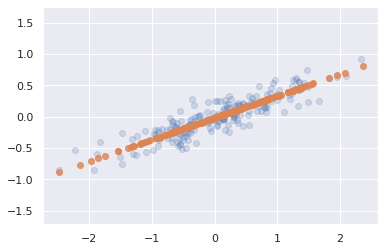

In [9]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Açık renkli noktalar orijinal verilerdir, karanlık renkli noktalar ise öngörülen versiyondur. 

Bu, bir PCA boyutsallık indirgemesinin ne anlama geldiğini netleştirir: en az önemli ana eksen veya diğer eksenlerdeki bilgiler kaldırılır, yalnızca verilerin en yüksek varyansa sahip bileşenlerini/bileşenlerini bırakılır.

Kesilen varyans fraksiyonu (bu şekilde oluşturulan çizgi etrafındaki noktaların yayılmasıyla orantılı), kabaca bu boyutluluk indirgemesinde ne kadar "bilginin" atıldığının bir ölçüsüdür.

Bu küçültülmüş boyutlu veri kümesi, bazı açılardan noktalar arasındaki en önemli ilişkileri kodlamak için "yeterince iyidir": veri boyutunu %50 oranında azaltmasına rağmen, veri noktaları arasındaki genel ilişki çoğunlukla korunur.


### Görselleştirme için PCA: Elle yazılmış rakamlar

Boyut azaltmanın faydasını sadece iki boyutlu veride görmek zor olabilir, ancak yüksek boyutlu verilere bakıldığında çok daha açık hale gelir.
Bunu görmek için, uygulamasına hızlı bir göz atalım.

Verileri yükleyerek başlıyoruz:

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Verilerin 8×8 piksel görüntülerden oluştuğunu, yani 64 boyutlu olduklarını hatırlayın.

Bu noktalar arasındaki ilişkiler hakkında biraz fikir edinmek için, bunları daha yönetilebilir sayıda boyuta yansıtmak için PCA'yı kullanabiliriz, örneğin iki boyut:


In [11]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Artık veriler hakkında bilgi edinmek için her noktanın ilk iki temel bileşenini çizebiliriz:

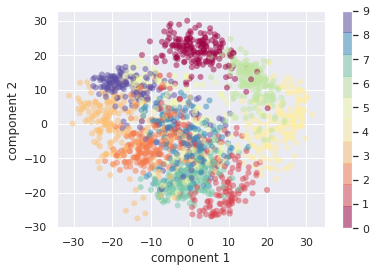

In [14]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Bu bileşenlerin ne anlama geldiğini hatırlayın: veri 64 boyutlu bir nokta bulutudur ve bu noktalar en büyük varyansa sahip yönler boyunca her bir veri noktasının izdüşümüdür.

Esasen, 64 boyutlu uzayda, rakamların düzenini iki boyutlu görmemizi sağlayan optimal esneme ve döndürmeyi bulduk ve bunu denetimsiz bir şekilde, yani etiketlere başvurmadan yaptık.


### Bileşenler ne anlama geliyor?

Burada biraz daha ileri gidebilir ve küçültülmüş boyutların *ne anlama geldiğini* sormaya başlayabiliriz.

Bu anlam, temel vektörlerin kombinasyonları cinsinden anlaşılabilir.

Örneğin, eğitim kümesindeki her görüntü, vektörü $x$ olarak adlandıracağımız 64 piksel değerinden oluşan bir koleksiyonla tanımlanır:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

Bunu düşünmemizin bir yolu piksel bazındadır.

Yani, görüntüyü oluşturmak için vektörün her bir öğesini tanımladığı pikselle çarparız ve ardından görüntüyü oluşturmak için sonuçları bir araya toplarız:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

Bu verilerin boyutunu küçültmeyi hayal etmenin bir yolu, bu temel vektörlerin birkaçı dışında hepsini sıfırlamaktır.

Örneğin, yalnızca ilk sekiz pikseli kullanırsak, verilerin sekiz boyutlu bir projeksiyonunu elde ederiz, ancak bu, görüntünün tamamını pek yansıtmaz: piksellerin yaklaşık %90'ını atmışızdır!

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-digits-pixel-components.png?raw=1)

Panellerin üst sırası tek tek pikselleri gösterir ve alt sıra bu piksellerin görüntünün oluşumuna kümülatif katkısını gösterir.

Piksel tabanlı bileşenlerin yalnızca sekizini kullanarak, 64 piksellik görüntünün yalnızca küçük bir bölümünü oluşturabiliriz.

Bu diziye devam edip 64 pikselin tamamını kullansaydık, orijinal görüntüyü kurtarırdık.

Ancak piksel bazında temsil, tek temel seçimi değildir. Her biri her pikselden önceden tanımlanmış katkılar içeren diğer temel işlevleri de kullanabilir ve şöyle bir şey yazabiliriz.

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA, en uygun temel fonksiyonları seçme süreci olarak düşünülebilir, öyle ki bunlardan sadece ilk birkaçını bir araya getirmek, veri kümesindeki öğelerin büyük bir kısmını uygun şekilde yeniden yapılandırmak için yeterlidir.

Verilerimizin düşük boyutlu gösterimi olarak işlev gören temel bileşenler, bu dizideki öğelerin her birini çarpan katsayılardır.

Bu şekil, ortalama artı ilk sekiz PCA temel fonksiyonunu kullanarak bu basamağı yeniden oluşturmanın benzer bir tasvirini göstermektedir:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-digits-pca-components.png?raw=1)

Piksel temelinden farklı olarak, PCA temeli, giriş görüntüsünün göze çarpan özelliklerini yalnızca bir (ortalama + sekiz bileşen)'le kurtarmamıza olanak tanır!

Her bileşendeki her pikselin miktarı, iki boyutlu örneğimizde vektörün yöneliminin doğal sonucudur.

Bu, PCA'nın verilerin düşük boyutlu bir temsilini sağladığı anlamdadır: giriş verilerinin yerel piksel temelinden daha verimli olan bir dizi temel işlevi keşfeder.

### Bileşen sayısının seçimi

PCA'yı pratikte kullanmanın hayati bir parçası, verileri tanımlamak için kaç bileşenin gerekli olduğunu tahmin etme yeteneğidir.

Bu, bileşen sayısının bir fonksiyonu olarak kümülatif *açıklanan varyans oranına* bakılarak belirlenebilir:


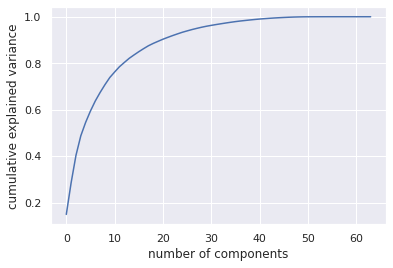

In [15]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Bu eğri, toplam 64 boyutlu varyansın ne kadarının ilk $N$ bileşenlerinde kapsandığını nicelleştirir.

Örneğin, rakamlarla ilk 10 bileşenin varyansın yaklaşık %75'ini içerdiğini, varyansın %100'e yakınını tanımlamak için yaklaşık 50 bileşene ihtiyacınız olduğunu görüyoruz.

Burada, iki boyutlu projeksiyonumuzun çok fazla bilgi kaybettiğini (açıklanan varyansla ölçüldüğü gibi) ve varyansın %90'ını korumak için yaklaşık 20 bileşene ihtiyacımız olduğunu görüyoruz. Yüksek boyutlu bir veri kümesi için bu çizime bakmak, çoklu gözlemlerde mevcut olan fazlalık düzeyini anlamanıza yardımcı olabilir.


## Gürültü Filtreleme'de PCA

PCA, gürültülü veriler için bir filtreleme yaklaşımı olarak da kullanılabilir.

**Fikir şudur: Varyansı gürültünün etkisinden çok daha büyük olan herhangi bir bileşen gürültüden nispeten etkilenmemelidir.**

Dolayısıyla, verileri yalnızca en büyük temel bileşenler alt kümesini kullanarak yeniden yapılandırırsanız, tercihen sinyali tutmalı ve gürültüyü dışarı atmalısınız.

Rakam verileriyle bunun nasıl göründüğüne bakalım.
İlk olarak, girdi gürültüsüz verilerin birkaçını çizeceğiz:

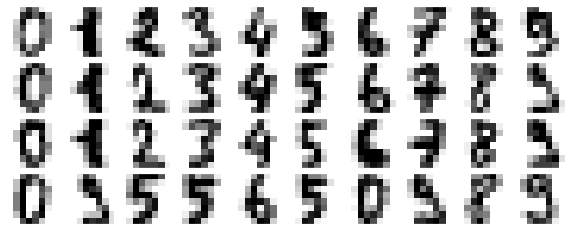

In [16]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Şimdi gürültülü bir veri kümesi oluşturmak için biraz rastgele gürültü ekleyelim ve yeniden çizelim:

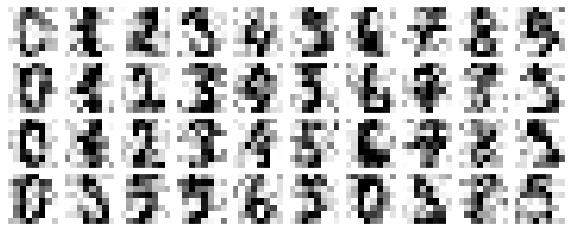

In [17]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Görüntülerin gürültülü olduğu ve sahte pikseller içerdiği gözle açıktır.
Projeksiyonun varyansın %50'sini korumasını talep ederek gürültülü veriler üzerinde bir PCA eğitelim:

In [19]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Burada varyansın %50'si 12 temel bileşene tekabül etmektedir.
Şimdi bu bileşenleri hesaplıyoruz ve ardından filtrelenmiş rakamları yeniden oluşturmak için dönüşümün tersini kullanıyoruz:

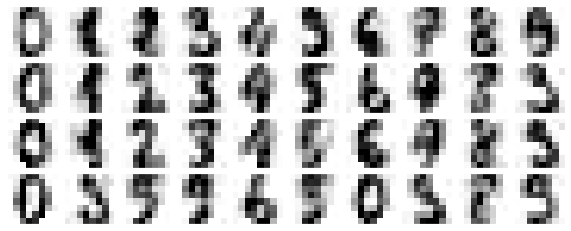

In [21]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Bu sinyal koruma/gürültü filtreleme özelliği, PCA'yı çok kullanışlı bir özellik seçim rutini haline getirir; örneğin, bir sınıflandırıcıyı çok yüksek boyutlu veriler üzerinde eğitmek yerine, sınıflandırıcıyı otomatik olarak filtrelemeye hizmet edecek olan daha düşük boyutlu temsil üzerinde eğitebilirsiniz.

## Principal Component Analysis Özet

Bu bölümde, boyut azaltma, yüksek boyutlu verilerin görselleştirilmesi, gürültü filtreleme ve yüksek boyutlu verilerde özellik seçimi için temel bileşen analizinin kullanımını tartıştık.

PCA'nın çok yönlülüğü ve yorumlanabilirliği nedeniyle, çok çeşitli bağlamlarda ve disiplinlerde etkili olduğu gösterilmiştir.

Herhangi bir yüksek boyutlu veri seti verildiğinde, noktalar arasındaki ilişkiyi görselleştirmek (rakamlarla yaptığımız gibi), verilerdeki ana varyansı anlamak için PCA ile başlama eğilimindeyim. 

**Kesinlikle PCA, her yüksek boyutlu veri kümesi için yararlı değildir, ancak yüksek boyutlu veriler hakkında fikir edinmek için basit ve verimli bir yol sunar.**

PCA'nın temel zayıflığı, verilerdeki aykırı değerlerden yüksek oranda etkilenme eğiliminde olmasıdır.

Bu nedenle, birçoğu ilk bileşenler tarafından yetersiz bir şekilde açıklanan veri noktalarını yinelemeli olarak atmak için hareket eden birçok sağlam PCA varyantı geliştirilmiştir.

Scikit-Learn, her ikisi de "sklearn.decomposition" alt modülünde bulunan "RandomizedPCA" ve "SparsePCA" dahil olmak üzere PCA üzerinde birkaç ilginç varyant içerir.
